In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

Imporing Lybraryies

In [103]:
df=pd.read_csv(r'C:\Users\Ankita\Desktop\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Loading Data

In [104]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Describe last 5 values in dataset

In [105]:
df.shape

(891, 12)

We have 891 rows and 12 columns

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Describe the information of the dataset

In [107]:
df['Name'].nunique()

891

Describe Name column unique values

In [108]:
df['Ticket'].nunique()

681

Describe Ticket column unique values

In [109]:
df['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

Describe PassengerId unique column

In [110]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [111]:
df=df.drop(['Cabin'],axis=1)

In PassengerId, Name, Ticket, Cabin are more than 80 persecnt unique values and this column are not much important so drop this columns.

In [112]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Describe datatypes of all the columns in dataset.

In [113]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Checking the missing values in dataset there are Sex and Embarked columns missing values present

In [114]:
df.isnull().sum() * 100 / len(df)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

Percentage of missing values

In [115]:
df['Survived'].unique()

array([0, 1], dtype=int64)

Target column unique values

In [116]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [117]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Value counts of Target column there are clas inbalanced issue occure

In [118]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Describe dataset

In [119]:
df['Sex'].replace('female', 0,inplace=True)
df['Sex'].replace('male', 1,inplace=True)


df['Embarked'].replace('S', 0,inplace=True)
df['Embarked'].replace('C', 1,inplace=True)
df['Embarked'].replace('Q', 2,inplace=True)


Here categorical columns Sex and Embarked are converted into numeric

In [120]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

After converting categorical column into numeric

In [121]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


Describe first 5 rows in dataset

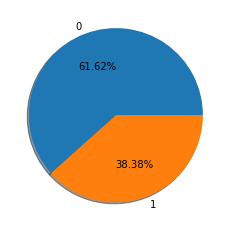

In [122]:
labels='0','1'
fig, ax = plt.subplots()
ax.pie(df['Survived'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

Descripe target column Survived by using subplots

Univariate analysis

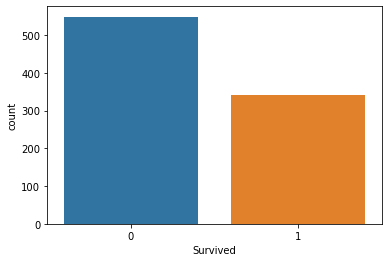

In [123]:
sns.countplot(df['Survived']);

Describe the target column values by using graph

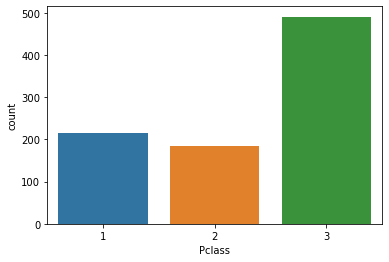

In [124]:
sns.countplot(df['Pclass']);

Describe the Pclass column values by using graph

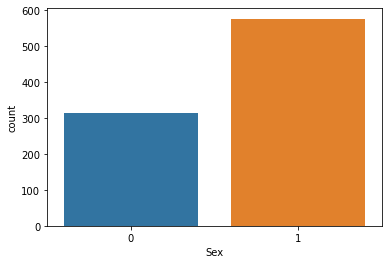

In [125]:
sns.countplot(df['Sex']);

Describe the Sex column values by using graph

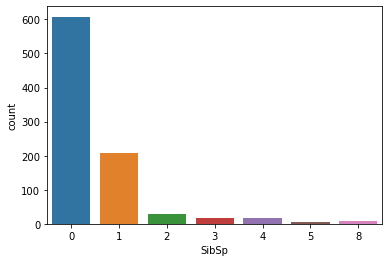

In [126]:
sns.countplot(df['SibSp']);

Describe the SibSp column values by using graph

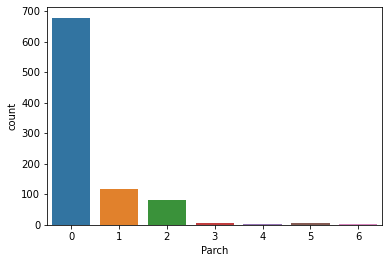

In [127]:
sns.countplot(df['Parch']);

Describe the Parch column values by using graph

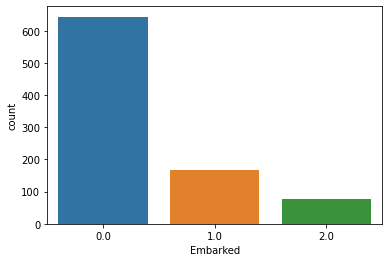

In [128]:
sns.countplot(df['Embarked']);

Describe the Embarked column values by using graph

Check Data is not normally distributed by using pairplot

<AxesSubplot:xlabel='Survived', ylabel='Density'>

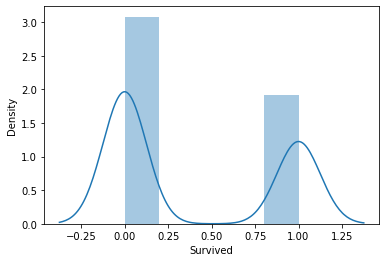

In [129]:
sns.distplot(df["Survived"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

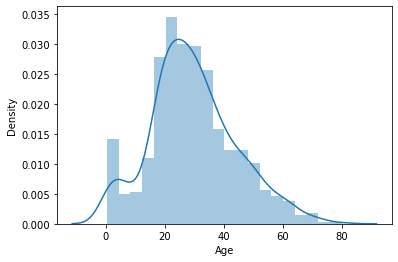

In [130]:
sns.distplot(df["Age"])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

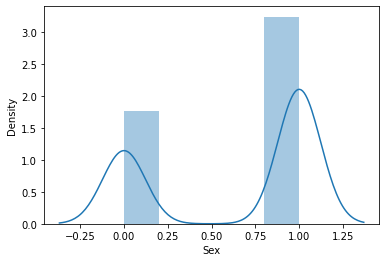

In [131]:
sns.distplot(df["Sex"])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

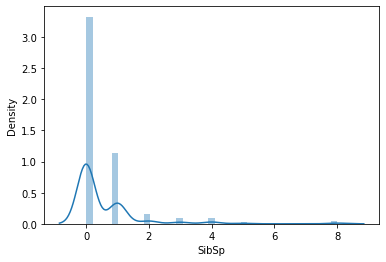

In [132]:
sns.distplot(df["SibSp"])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

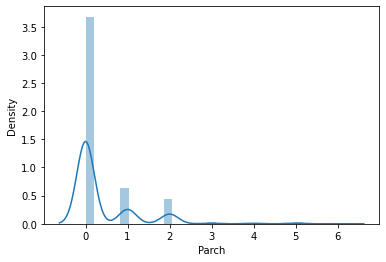

In [133]:
sns.distplot(df["Parch"])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

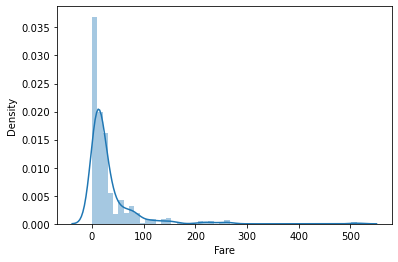

In [134]:
sns.distplot(df["Fare"])

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

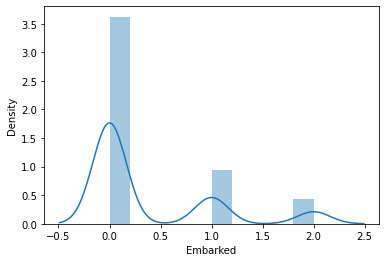

In [135]:
sns.distplot(df["Embarked"])

Here data are not normally distributed all the columns

Identifying outliers

<AxesSubplot:xlabel='Survived'>

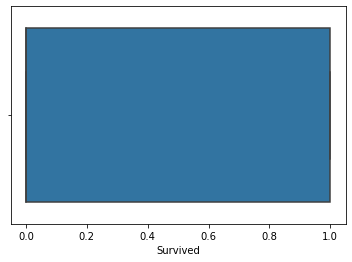

In [136]:
sns.boxplot(df["Survived"])

<AxesSubplot:xlabel='Pclass'>

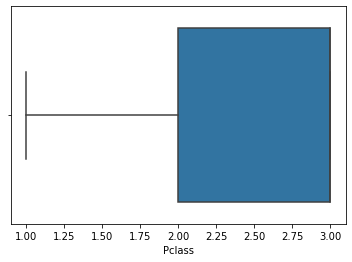

In [137]:
sns.boxplot(df["Pclass"])

<AxesSubplot:xlabel='Sex'>

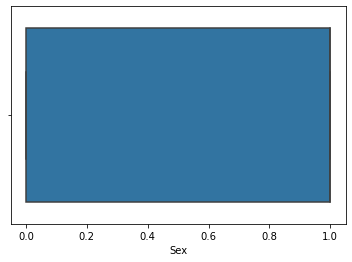

In [138]:
sns.boxplot(df["Sex"])

<AxesSubplot:xlabel='Age'>

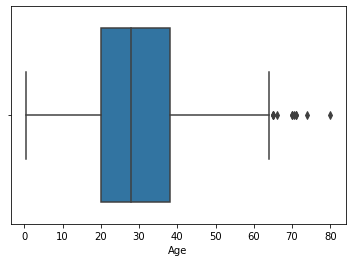

In [139]:
sns.boxplot(df["Age"])

<AxesSubplot:xlabel='SibSp'>

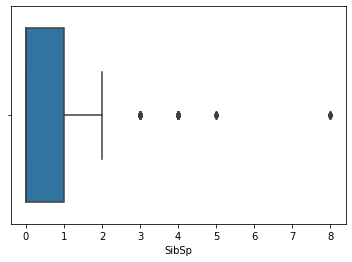

In [140]:
sns.boxplot(df["SibSp"])

<AxesSubplot:xlabel='Parch'>

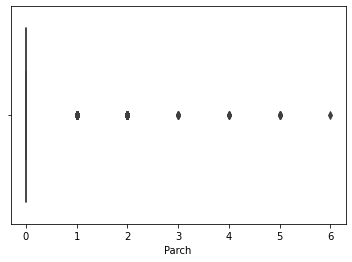

In [141]:
sns.boxplot(df["Parch"])

<AxesSubplot:xlabel='Fare'>

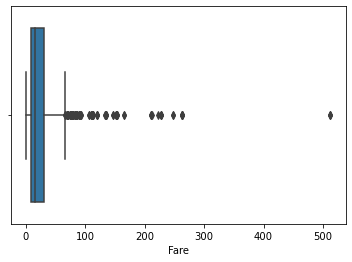

In [142]:
sns.boxplot(df["Fare"])

<AxesSubplot:xlabel='Embarked'>

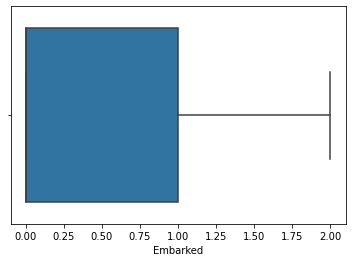

In [143]:
sns.boxplot(df["Embarked"])

Outliers are present in Age, Sibsp, Parch , Fare columns.

Bi-variate Analysis

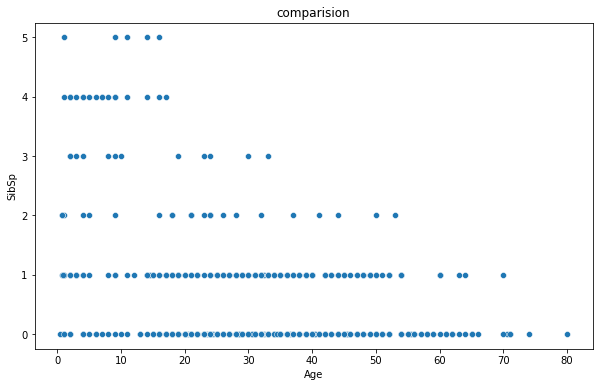

In [144]:
plt.figure(figsize=[10,6])
plt.title('comparision')
sns.scatterplot(df['Age'],df['SibSp']);

Comparision of two columns

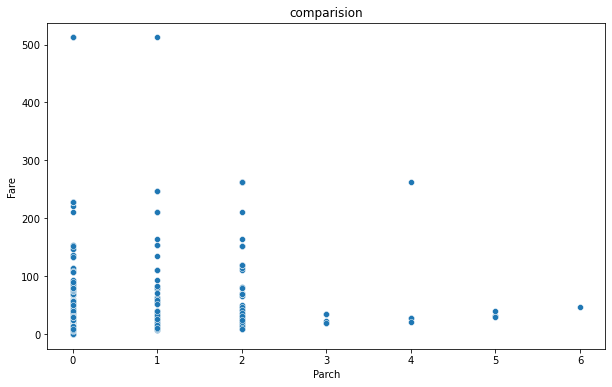

In [145]:
plt.figure(figsize=[10,6])
plt.title('comparision')
sns.scatterplot(df['Parch'],df['Fare']);

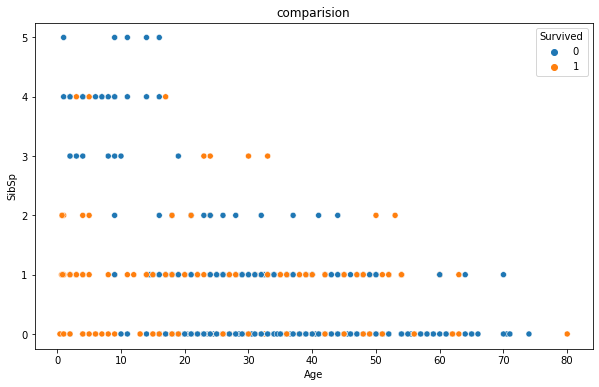

In [146]:
plt.figure(figsize=[10,6])
plt.title('comparision')
sns.scatterplot(df['Age'],df['SibSp'],hue=df["Survived"]);

Comparisions of two columns using target column

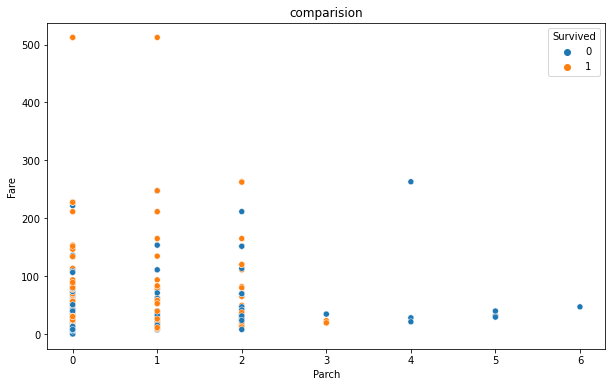

In [147]:
plt.figure(figsize=[10,6])
plt.title('comparision')
sns.scatterplot(df['Parch'],df['Fare'],hue=df["Survived"]);

Multi-variate Analysis

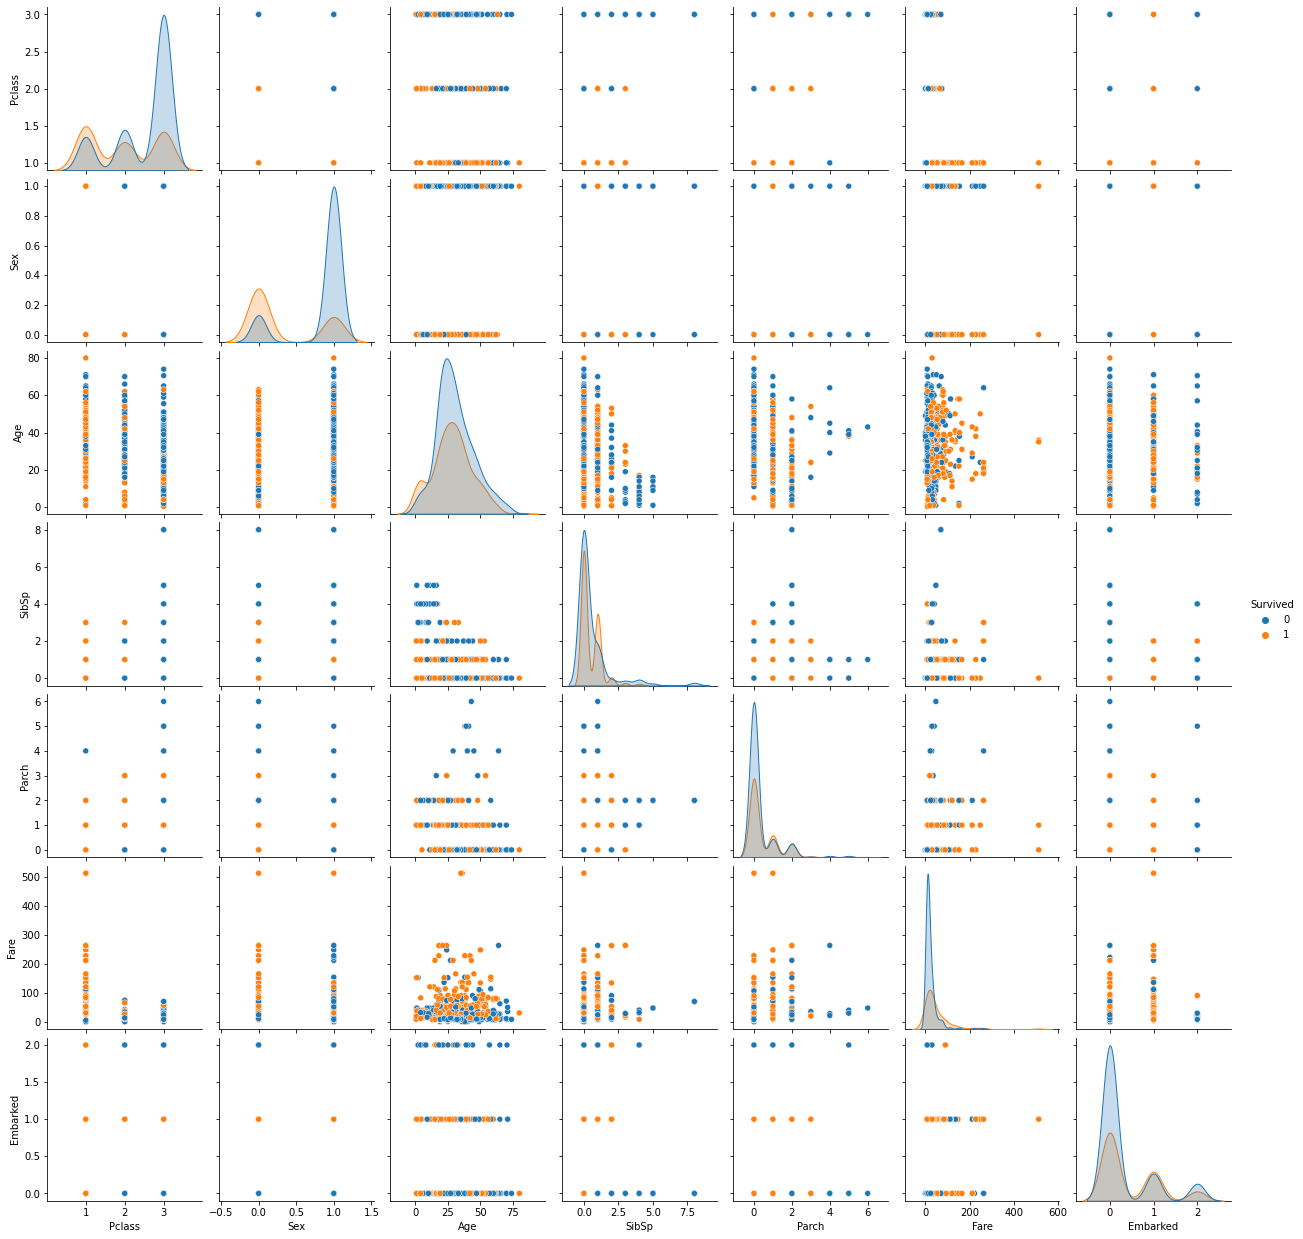

In [148]:
sns.pairplot(df,hue="Survived")

Check the relationship of independent variable with target variable

In [149]:
cor=df.corr()

In [150]:
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.118593
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,0.108669,0.043835,-0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


<AxesSubplot:>

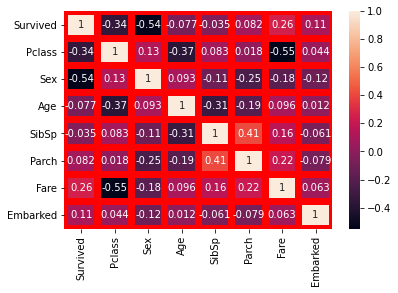

In [151]:
sns.heatmap(cor,annot=True,linewidth=6,linecolor='r')

Describe heatmap

In [152]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

Describe datatypes of all the columns

In [153]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


After correlation describe dataset

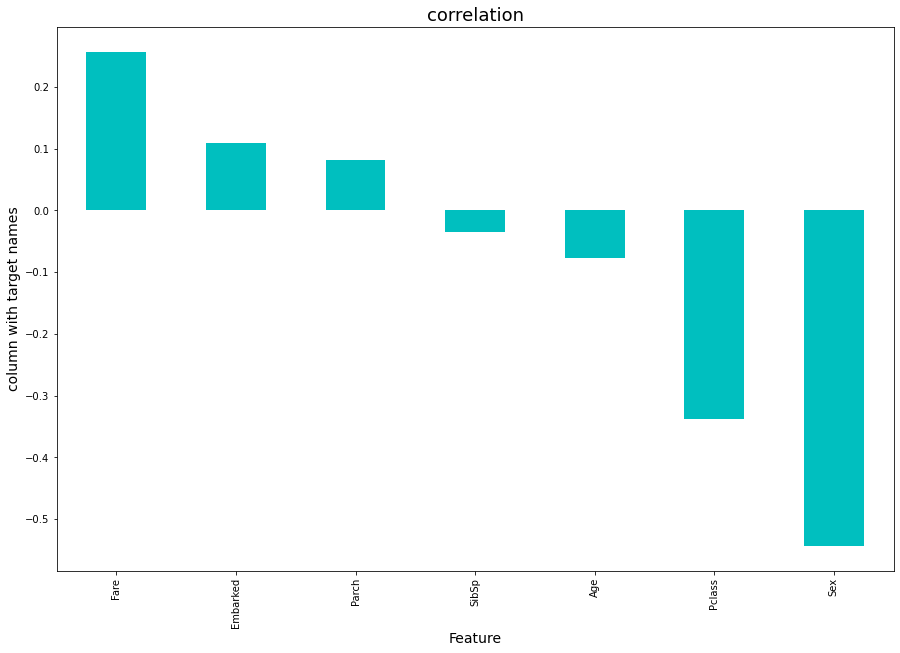

In [154]:
plt.figure(figsize=(15,10))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Describe correlation different way

In [155]:
(df < 0).any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [156]:
(y< 0).any()

False

In [157]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Checking missing values in dataset

In [158]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].median())

Remove null values in column by using mean and median 

In [159]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

After removing missing values there are no missing values indataset

In [160]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

Oversampling:

In [161]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x, y = SM.fit_resample(x,y)

Class imbalance issue solve using SMOTE method of oversampling

In [162]:
y.value_counts()

1    549
0    549
Name: Survived, dtype: int64

Now target columns classes are balanced

Zscore method check the dataloss:

In [163]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [164]:
new_df.shape

(820, 8)

In [165]:
df.shape

(891, 8)

In [166]:
Data_loss=((891-820)/891)*100

In [167]:
Data_loss

7.968574635241302

In [168]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [169]:
df_new.shape

(577, 8)

Using Zscore method and IQR method check the dataloss

Check the skewness:

In [170]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

In [171]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
dfpt=pt.fit_transform(df)
df=pd.DataFrame(dfpt,columns=df.columns)

Use power transform to remove skewness

In [172]:
df.skew()

Survived    0.478523
Pclass     -0.441438
Sex        -0.618921
Age         0.064420
SibSp       0.808608
Parch       1.228795
Fare       -0.040329
Embarked    1.013716
dtype: float64

After using power transform some categorical columns skewness are present so no need to check skewness in categorical coluns. 

In [173]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Import Librayies

Use different models to select best accracy score and select best model.

In [174]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on random sate",maxRS)

Best accuracy is 0.8636363636363636 on random sate 57


LogisticRegression is use to check accuracy score

In [175]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
LR = LogisticRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7818181818181819
[[126  33]
 [ 39 132]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       159
           1       0.80      0.77      0.79       171

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330



Use LogisticRegression and chech accuracy score, confusion metrix and classification report.

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8242424242424242
[[130  29]
 [ 29 142]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       159
           1       0.83      0.83      0.83       171

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



Use DecisionTreeClassifier and chech accuracy score, confusion metrix and classification report.

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8333333333333334
[[135  24]
 [ 31 140]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       159
           1       0.85      0.82      0.84       171

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



Use  RandomForestClassifier and chech accuracy score, confusion metrix and classification report.

In [179]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svc=  SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6545454545454545
[[127  32]
 [ 82  89]]
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       159
           1       0.74      0.52      0.61       171

    accuracy                           0.65       330
   macro avg       0.67      0.66      0.65       330
weighted avg       0.67      0.65      0.65       330



 Use  SVCr and chech accuracy score, confusion metrix and classification report

In [180]:
from sklearn.model_selection import cross_val_score

In [181]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.8097633872976339


Check cross validation score of LogisticRegression algorithm.

In [182]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.819804898298049


Check cross validation score of DecisionTreeClassifier algorithm.

In [183]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.839813200498132


Check cross validation score of RandomForestClassifier algorithm.

In [184]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.6621170610211706


Check cross validation score of SVC algorithm.

Here After using different modl and checking cross validation score the DecisionTreeClassifier is the best model so apply Hyperparameter tunning on this model

In [185]:
from sklearn.model_selection import GridSearchCV


Import GridSearchCV library

In [186]:
import numpy as np

In [187]:
parameter = {'max_depth' : np.arange(2,5),
            'criterion' : ['gini','entropy'],
            'max_features' : ["auto", "sqrt", "log2"]}

Use  DecisionTreeClassifier parameter list for select best parameter.

In [188]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

Intialize 

In [189]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [190]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2'}

Best parameter list of DesicionTreeClassifier

In [194]:
Final_mod = DecisionTreeClassifier(criterion= 'entropy', max_depth=4,max_features='log2')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

76.66666666666667


Finally print best accuracy score

In [195]:
from sklearn.metrics import plot_roc_curve

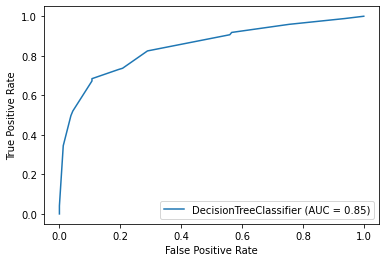

In [196]:
plot_roc_curve(Final_mod,x_test,y_test)

Plot ROC curve and AUC value

Saving the model

In [99]:
import joblib
joblib.dump(Final_mod,"Titanic.pk1")

['Titanic.pk1']

Loading the model

In [100]:
mod=joblib.load("Titanic.pk1")

In [101]:
print(mod.predict(x_test))

[1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1
 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0
 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1]


Finally creating best model